In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import joblib
from sentence_transformers import CrossEncoder
import json

In [1785]:
df=pd.read_csv('./combined_salaries.csv')

In [1786]:
df.columns

Index(['Unnamed: 0', 'Age', 'Gender', 'Education Level', 'Job Title',
       'Years of Experience', 'Salary', 'Country', 'Race'],
      dtype='object')

In [1787]:
df.head()

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0.0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1.0,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2.0,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3.0,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4.0,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian


In [1788]:
df.tail()

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
6999,NaN,31.0,NaN,PhD,NLP Engineer,4.0,131257.17,NaN,NaN
7000,NaN,28.0,NaN,Bachelors,Software Engineer,3.9,109825.82,NaN,NaN
7001,NaN,29.0,NaN,Bachelors,Data Analyst,5.2,77623.44,NaN,NaN
7002,NaN,39.0,NaN,Masters,Data Scientist,17.7,242423.45,NaN,NaN
7003,NaN,29.0,NaN,Bachelors,Computer Vision Engineer,7.3,141512.19,NaN,NaN


In [1789]:
df.drop(columns=['Unnamed: 0','Country', 'Race','Gender'],inplace=True)


In [1790]:
df.head()

,Age,Education Level,Job Title,Years of Experience,Salary
0,32.0,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Master's,Data Analyst,3.0,65000.0
2,45.0,PhD,Senior Manager,15.0,150000.0
3,36.0,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Master's,Director,20.0,200000.0


## Data Preprocessing

In [1791]:
df.shape

(7004, 5)

In [1792]:
df.isnull().sum()

Age                    2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [1793]:
df.dropna(inplace=True,axis=0)

In [ ]:

df.isnull().sum()

Age                    0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [1795]:
df.dtypes

Age                    float64
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object

In [ ]:

df.nunique()

Age                     42
Education Level          9
Job Title              200
Years of Experience    152
Salary                 739
dtype: int64

In [1797]:
df['Job Title'].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

In [1798]:
def categorize_job_title(job_title):
    job_title = str(job_title).lower()
    if any(keyword in job_title for keyword in ['ai engineer', 'nlp', 'computer vision']):
        return 'AI Engineer/NLP/CV'
    elif any(keyword in job_title for keyword in ['data scientist', 'data engineer', 'machine learning engineer', 'ml engineer', 'ml', 'data']):
        return 'Data/ML Engineer'
    elif any(keyword in job_title for keyword in [
        'software', 'developer', 'backend', 'front end', 'frontend', 'full stack', 
        'fullstack', 'node', 'node.js', 'php', 'nestjs', 'java', 'c#', 'python', 
        'ruby', 'rails', 'django', 'flask', 'angular', 'react', 'vue', 'typescript', 'javascript'
    ]):
        return 'Software/Developer'
    elif any(keyword in job_title for keyword in ['manager', 'director', 'vp']):
        return 'Manager/Director/VP'
    elif any(keyword in job_title for keyword in ['sales', 'representative']):
        return 'Sales'
    elif any(keyword in job_title for keyword in ['marketing', 'social media']):
        return 'Marketing/Social Media'
    elif any(keyword in job_title for keyword in ['product', 'designer']):
        return 'Product/Designer'
    elif any(keyword in job_title for keyword in ['hr', 'human resources']):
        return 'HR/Human Resources'
    elif any(keyword in job_title for keyword in ['financial', 'accountant']):
        return 'Financial/Accountant'
    elif 'project manager' in job_title:
        return 'Project Manager'
    elif any(keyword in job_title for keyword in ['it', 'support']):
        return 'IT/Technical Support'
    elif any(keyword in job_title for keyword in ['operations', 'supply chain']):
        return 'Operations/Supply Chain'
    elif any(keyword in job_title for keyword in ['customer service', 'receptionist']):
        return 'Customer Service/Receptionist'
    else:
        return 'Other'
df['Job Title']=df['Job Title'].apply(categorize_job_title)


In [1799]:
df[df['Job Title']=='AI Engineer/NLP/CV']

,Age,Education Level,Job Title,Years of Experience,Salary
6710,41.0,Bachelors,AI Engineer/NLP/CV,12.1,168765.76
6713,33.0,Bachelors,AI Engineer/NLP/CV,2.6,112421.72
6715,27.0,Bachelors,AI Engineer/NLP/CV,0.0,135013.22
6720,26.0,Bachelors,AI Engineer/NLP/CV,4.7,114499.89
6722,33.0,Bachelors,AI Engineer/NLP/CV,9.2,150431.00
...,...,...,...,...,...
6992,29.0,PhD,AI Engineer/NLP/CV,3.1,148915.72
6996,23.0,Masters,AI Engineer/NLP/CV,4.5,145060.21
6998,34.0,Masters,AI Engineer/NLP/CV,9.6,170781.31
6999,31.0,PhD,AI Engineer/NLP/CV,4.0,131257.17


In [1800]:
df['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', "Bachelor's Degree",
       "Master's Degree", 'High School', 'phD', 'Bachelors', 'Masters'],
      dtype=object)

In [1801]:
objects_cols=df.select_dtypes(include='object')
for col in objects_cols:
    print(col,df[col].unique())

Education Level ["Bachelor's" "Master's" 'PhD' "Bachelor's Degree" "Master's Degree"
 'High School' 'phD' 'Bachelors' 'Masters']
Job Title ['Software/Developer' 'Data/ML Engineer' 'Manager/Director/VP' 'Sales'
 'Marketing/Social Media' 'Other' 'Financial/Accountant'
 'Customer Service/Receptionist' 'IT/Technical Support' 'Product/Designer'
 'HR/Human Resources' 'Operations/Supply Chain' 'AI Engineer/NLP/CV']


In [1802]:
def group_education(Educaton):
    
    Educaton = str(Educaton).lower()
    if 'high school' in Educaton:
        return 'High School'
    elif 'bachelor\'s' in Educaton:
        return 'Bachelors'
    elif 'master\'s' in Educaton:
        return 'Masters'
    elif 'phd' in Educaton:
        return 'PhD'

df['Education Level'] = df['Education Level'].apply(group_education)   

In [ ]:
import numpy as np

def adjust_salary(df):
    MIN_SALARY = 150
    MAX_SALARY = 2500
    BASE_SALARY = 300  

    edu_bonus = {
        'High School': 0,
        'Bachelors': 100,
        'Masters': 200,
        'PhD': 300,
        None: 0
    }

    job_bonus = {
        'AI Engineer/NLP/CV': 500,
        'Data/ML Engineer': 400,
        'Software/Developer': 300,
        'Manager/Director/VP': 350,
        'Product/Designer': 200,
        'Financial/Accountant': 150,
        'Marketing/Social Media': 100,
        'Operations/Supply Chain': 100,
        'IT/Technical Support': 80,
        'HR/Human Resources': 80,
        'Sales': 50,
        'Customer Service/Receptionist': 50,
        'Other': 50
    }


    df['experience_factor'] = df['Years of Experience'] * 40


    df['edu_bonus'] = df['Education Level'].map(edu_bonus).fillna(0)
    df['job_bonus'] = df['Job Title'].map(job_bonus).fillna(50)


    df['Salary_Adjusted'] = BASE_SALARY + df['experience_factor'] + df['edu_bonus'] + df['job_bonus']


    df['Salary_Adjusted'] = df['Salary_Adjusted'].clip(MIN_SALARY, MAX_SALARY)


    df['Salary_Adjusted'] = df['Salary_Adjusted'] * np.random.uniform(0.95, 1.05, size=len(df))
    df['Salary_Adjusted'] = df['Salary_Adjusted'].round(0)

    return df


In [1805]:
df = adjust_salary(df)


In [1806]:
df.head()


,Age,Education Level,Job Title,Years of Experience,Salary,experience_factor,edu_bonus,job_bonus,Salary_Adjusted
0,32.0,Bachelors,Software/Developer,5.0,90000.0,200.0,100,300,914.0
1,28.0,Masters,Data/ML Engineer,3.0,65000.0,120.0,200,400,984.0
2,45.0,PhD,Manager/Director/VP,15.0,150000.0,600.0,300,350,1575.0
3,36.0,Bachelors,Sales,7.0,60000.0,280.0,100,50,697.0
4,52.0,Masters,Manager/Director/VP,20.0,200000.0,800.0,200,350,1642.0


In [1807]:
df.head()

,Age,Education Level,Job Title,Years of Experience,Salary,experience_factor,edu_bonus,job_bonus,Salary_Adjusted
0,32.0,Bachelors,Software/Developer,5.0,90000.0,200.0,100,300,914.0
1,28.0,Masters,Data/ML Engineer,3.0,65000.0,120.0,200,400,984.0
2,45.0,PhD,Manager/Director/VP,15.0,150000.0,600.0,300,350,1575.0
3,36.0,Bachelors,Sales,7.0,60000.0,280.0,100,50,697.0
4,52.0,Masters,Manager/Director/VP,20.0,200000.0,800.0,200,350,1642.0


In [1808]:
df.drop(columns=['Salary','experience_factor','edu_bonus',	'job_bonus'],inplace=True)

In [ ]:

df.describe()

,Age,Years of Experience,Salary_Adjusted
count,6998.000000,6998.000000,6998.000000
mean,33.588597,8.047785,1056.377822
std,7.553502,6.002899,345.511295
min,20.000000,0.000000,333.000000
25%,28.000000,3.000000,822.000000
50%,32.000000,7.000000,1027.000000
75%,38.000000,12.000000,1292.000000
max,62.000000,34.000000,2313.000000


In [1810]:
df.head()

,Age,Education Level,Job Title,Years of Experience,Salary_Adjusted
0,32.0,Bachelors,Software/Developer,5.0,914.0
1,28.0,Masters,Data/ML Engineer,3.0,984.0
2,45.0,PhD,Manager/Director/VP,15.0,1575.0
3,36.0,Bachelors,Sales,7.0,697.0
4,52.0,Masters,Manager/Director/VP,20.0,1642.0


In [1811]:
df[(df['Education Level']=='PhD' )&(df['Job Title']=='AI Engineer/NLP/CV')].describe()

,Age,Years of Experience,Salary_Adjusted
count,15.000000,15.000000,15.000000
mean,32.400000,6.533333,1372.066667
std,5.539469,4.574880,203.216797
min,23.000000,0.000000,1089.000000
25%,29.000000,3.150000,1206.500000
50%,32.000000,6.200000,1370.000000
75%,36.500000,9.250000,1446.500000
max,43.000000,16.400000,1809.000000


In [1812]:
df[(df['Education Level']=='PhD' )&(df['Job Title']=='Software/Developer')].describe()

,Age,Years of Experience,Salary_Adjusted
count,314.000000,314.000000,314.000000
mean,47.283439,16.918471,1576.671975
std,8.401995,6.627393,271.768256
min,23.000000,0.000000,881.000000
25%,43.000000,14.000000,1458.250000
50%,48.500000,16.000000,1552.000000
75%,54.000000,18.000000,1640.500000
max,62.000000,34.000000,2313.000000


## Exploratory Data Analysis

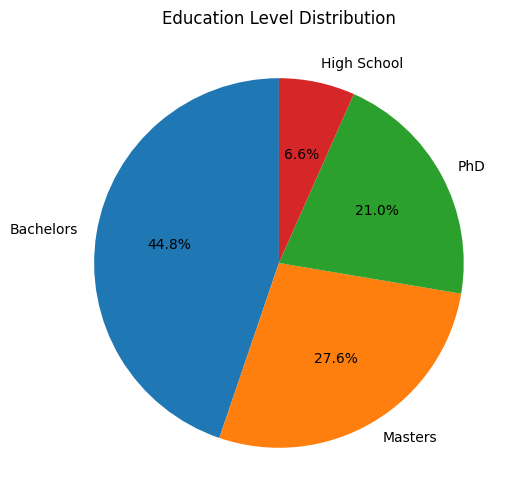

In [1813]:
plt.figure(figsize=(10,6))
plt.pie(df['Education Level'].value_counts(),labels=['Bachelors' ,'Masters' ,'PhD' ,'High School'],autopct='%1.1f%%',startangle=90)
plt.title('Education Level Distribution')
plt.show()

### Age Distribution

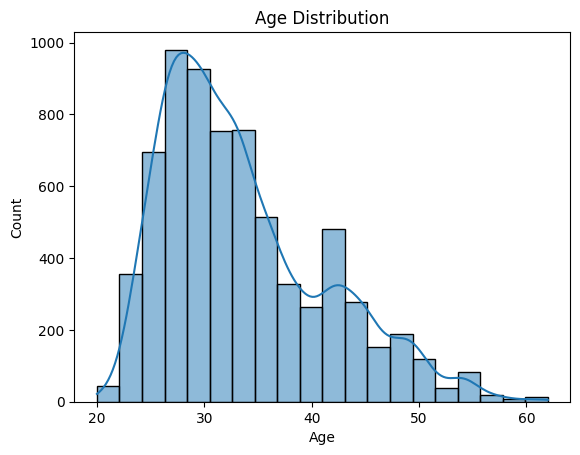

In [1814]:
sns.histplot(data=df, x='Age', bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

### Education Level

(array([   0.,  250.,  500.,  750., 1000., 1250., 1500., 1750., 2000.,
        2250., 2500.]),
 [Text(0.0, 0, '0'),
  Text(250.0, 0, '250'),
  Text(500.0, 0, '500'),
  Text(750.0, 0, '750'),
  Text(1000.0, 0, '1000'),
  Text(1250.0, 0, '1250'),
  Text(1500.0, 0, '1500'),
  Text(1750.0, 0, '1750'),
  Text(2000.0, 0, '2000'),
  Text(2250.0, 0, '2250'),
  Text(2500.0, 0, '2500')])

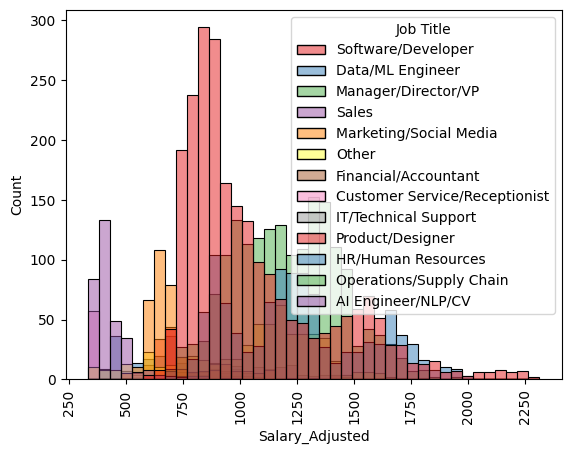

In [1815]:
sns.histplot(data=df, x='Salary_Adjusted',palette='Set1',hue='Job Title')
plt.xticks(rotation=90)

### Years of Experience

<Axes: xlabel='Years of Experience', ylabel='Count'>

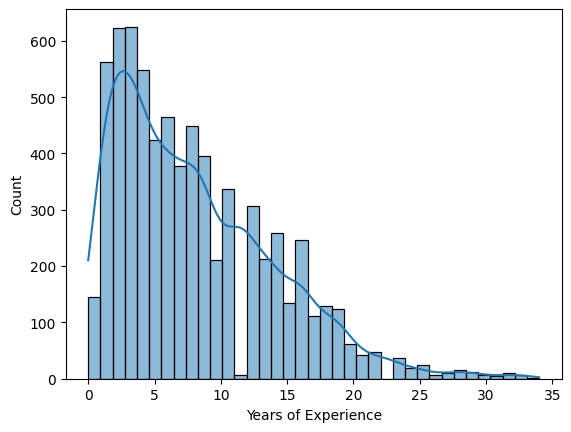

In [1816]:
sns.histplot(x = 'Years of Experience', data = df,kde=True)

### Age and Salary

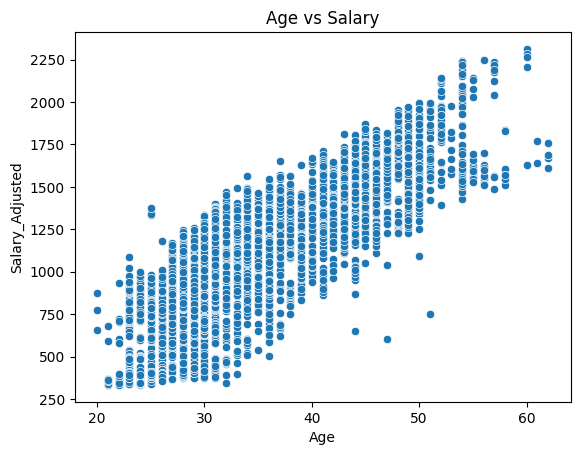

In [1817]:
sns.scatterplot(x='Age', y='Salary_Adjusted', data=df)
plt.title('Age vs Salary')
plt.show()

### YearsExperinees and Salary

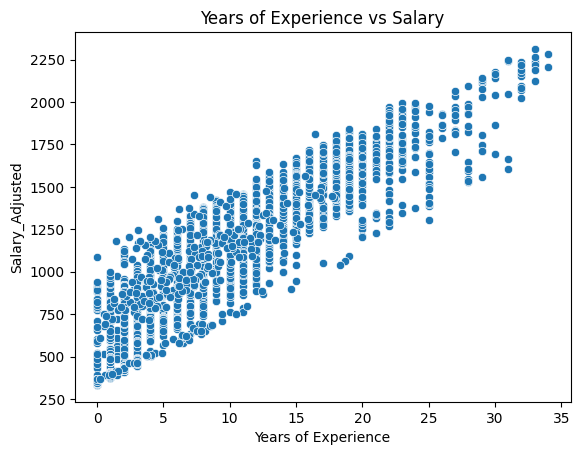

In [1818]:
sns.scatterplot(x='Years of Experience', y='Salary_Adjusted', data=df)
plt.title('Years of Experience vs Salary')
plt.show()

### Education Level and Salary

Text(0.5, 1.0, 'Education Level vs Salary')

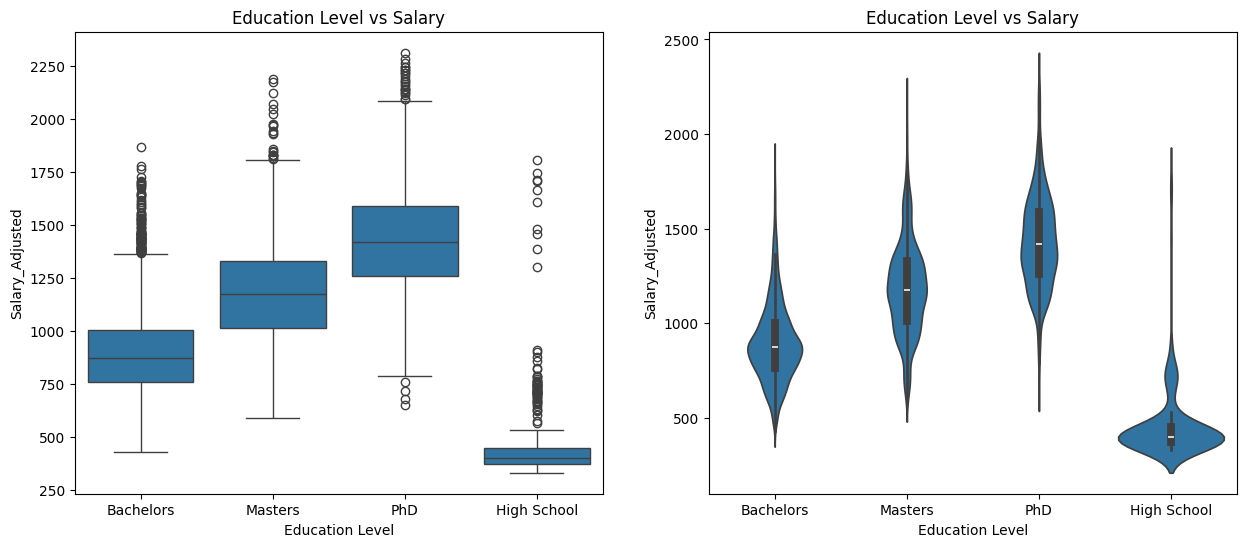

In [1819]:
fig,ax = plt.subplots(1,2,figsize=(15,6))
sns.boxplot(x = 'Education Level', y = 'Salary_Adjusted', data = df, ax=ax[0]).set_title('Education Level vs Salary')
sns.violinplot(x = 'Education Level', y = 'Salary_Adjusted', data = df, ax=ax[1]).set_title('Education Level vs Salary')

### Job title and Salary

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16548\2697044731.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Job Title', y='Salary_Adjusted', data=df, palette='Set2', ax=ax[0])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16548\2697044731.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Job Title', y='Salary_Adjusted', data=df, palette='Set3', ax=ax[1])


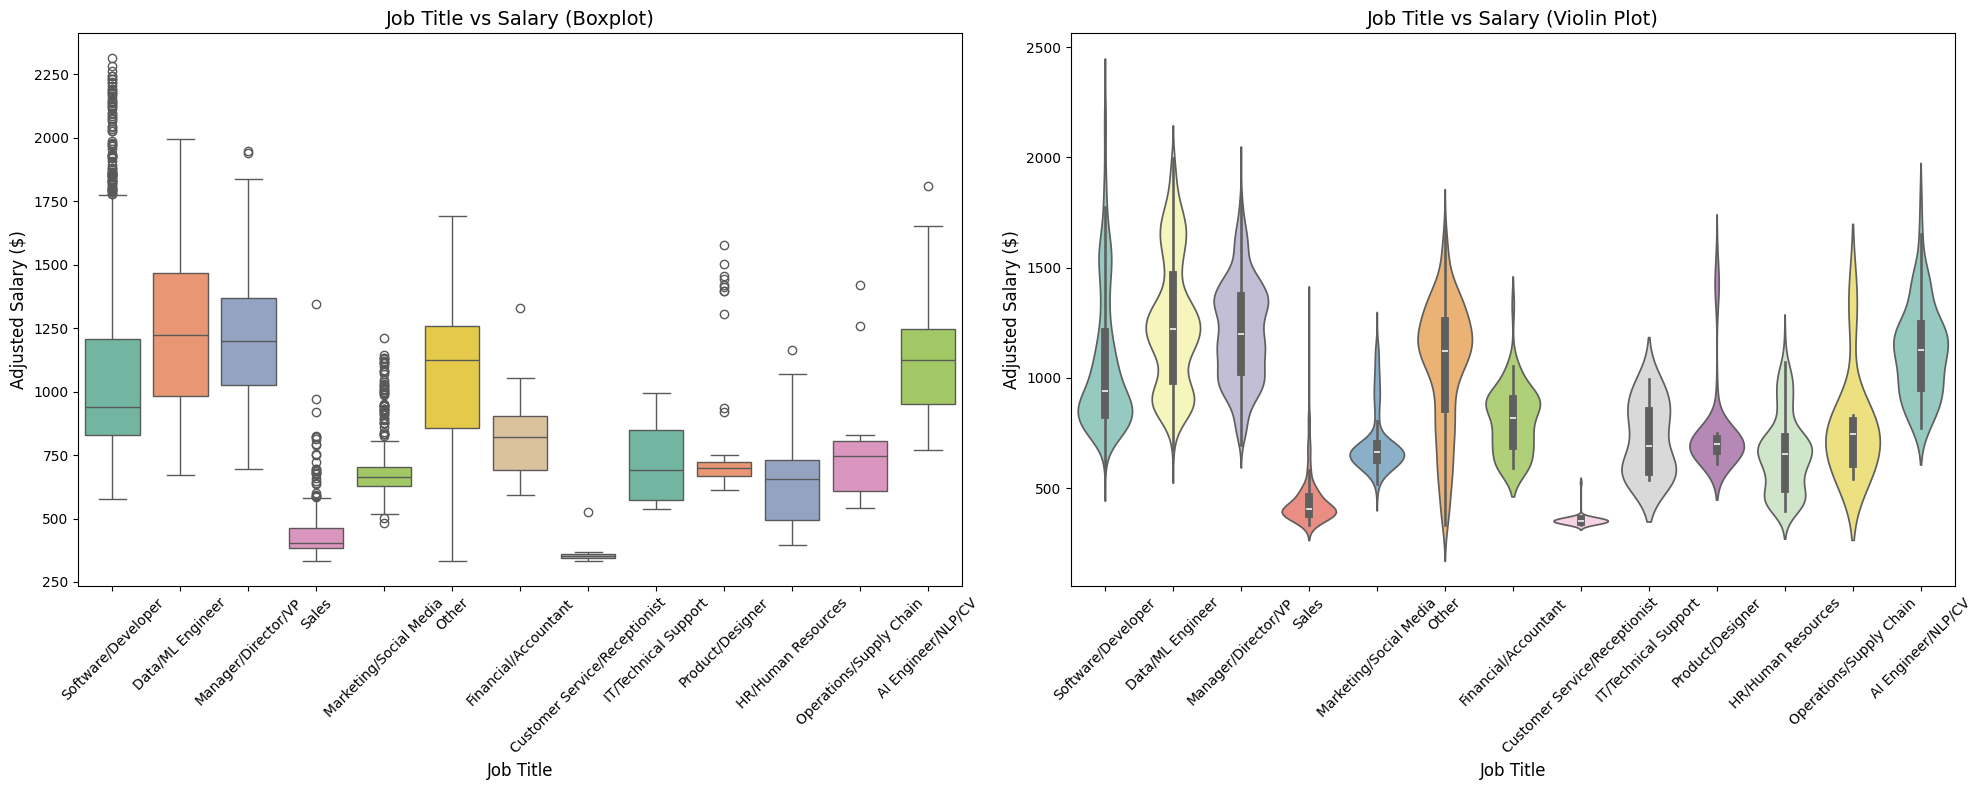

In [1820]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

sns.boxplot(x='Job Title', y='Salary_Adjusted', data=df, palette='Set2', ax=ax[0])
ax[0].set_title('Job Title vs Salary (Boxplot)', fontsize=14)
ax[0].set_xlabel('Job Title', fontsize=12)
ax[0].set_ylabel('Adjusted Salary ($)', fontsize=12)
ax[0].tick_params(axis='x', rotation=45)


sns.violinplot(x='Job Title', y='Salary_Adjusted', data=df, palette='Set3', ax=ax[1])
ax[1].set_title('Job Title vs Salary (Violin Plot)', fontsize=14)
ax[1].set_xlabel('Job Title', fontsize=12)
ax[1].set_ylabel('Adjusted Salary ($)', fontsize=12)
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Data Preprocessing 2

In [1821]:
df.head()

,Age,Education Level,Job Title,Years of Experience,Salary_Adjusted
0,32.0,Bachelors,Software/Developer,5.0,914.0
1,28.0,Masters,Data/ML Engineer,3.0,984.0
2,45.0,PhD,Manager/Director/VP,15.0,1575.0
3,36.0,Bachelors,Sales,7.0,697.0
4,52.0,Masters,Manager/Director/VP,20.0,1642.0


In [ ]:

df['Education Level'] = df['Education Level'].fillna('None')
df['Job Title'] = df['Job Title'].fillna('Other')


edu_importance = {
    'None': 0,
    'High School': 1,
    'Bachelors': 2,
    'Masters': 3,
    'PhD': 4
}
job_importance = {
    'Customer Service/Receptionist': 1,
    'Software/Developer': 2,
    'Data/ML Engineer': 3,
    'AI Engineer/NLP/CV': 4,
    'Manager/Director/VP': 3,
    'Product/Designer': 2,
    'Financial/Accountant': 2,
    'Marketing/Social Media': 1,
    'Operations/Supply Chain': 1,
    'IT/Technical Support': 1,
    'HR/Human Resources': 1,
    'Sales': 1,
    'Other': 1
}
df['Education Level'] = df['Education Level'].apply(lambda x: x if x in edu_importance else 'None')
df['Job Title'] = df['Job Title'].apply(lambda x: x if x in job_importance else 'Other')

df['Education_Encoded'] = df['Education Level'].map(edu_importance)
df['Job_Encoded'] = df['Job Title'].map(job_importance)


print(df[['Education Level','Education_Encoded','Job Title','Job_Encoded']].head(10))


  Education Level  Education_Encoded               Job Title  Job_Encoded
0       Bachelors                  2      Software/Developer            2
1         Masters                  3        Data/ML Engineer            3
2             PhD                  4     Manager/Director/VP            3
3       Bachelors                  2                   Sales            1
4         Masters                  3     Manager/Director/VP            3
5       Bachelors                  2  Marketing/Social Media            1
6         Masters                  3     Manager/Director/VP            3
7       Bachelors                  2     Manager/Director/VP            3
8       Bachelors                  2  Marketing/Social Media            1
9             PhD                  4                   Other            1


In [1823]:
df['Job Title'].unique()

array(['Software/Developer', 'Data/ML Engineer', 'Manager/Director/VP',
       'Sales', 'Marketing/Social Media', 'Other', 'Financial/Accountant',
       'Customer Service/Receptionist', 'IT/Technical Support',
       'Product/Designer', 'HR/Human Resources',
       'Operations/Supply Chain', 'AI Engineer/NLP/CV'], dtype=object)

### Normalization   

In [1824]:
df.iloc[6710]

Age                                31.0
Education Level                    None
Job Title              Data/ML Engineer
Years of Experience                 6.2
Salary_Adjusted                   927.0
Education_Encoded                     0
Job_Encoded                           3
Name: 6716, dtype: object

In [1825]:
df[(df['Education Level']=='Masters' )]

,Age,Education Level,Job Title,Years of Experience,Salary_Adjusted,Education_Encoded,Job_Encoded
1,28.0,Masters,Data/ML Engineer,3.0,984.0,3,3
4,52.0,Masters,Manager/Director/VP,20.0,1642.0,3,3
6,42.0,Masters,Manager/Director/VP,12.0,1396.0,3,3
10,29.0,Masters,Software/Developer,3.0,876.0,3,2
13,40.0,Masters,Manager/Director/VP,14.0,1421.0,3,3
...,...,...,...,...,...,...,...
6683,51.0,Masters,Manager/Director/VP,19.0,1561.0,3,3
6688,46.0,Masters,Manager/Director/VP,16.0,1544.0,3,3
6693,43.0,Masters,Manager/Director/VP,14.0,1438.0,3,3
6697,51.0,Masters,Manager/Director/VP,19.0,1666.0,3,3


In [1826]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()

df[['Years of Experience']] = scaler_X.fit_transform(df[['Years of Experience']])
df['Salary_Adjusted'] = scaler_y.fit_transform(df[['Salary_Adjusted']].values)

In [1827]:
df.head()

,Age,Education Level,Job Title,Years of Experience,Salary_Adjusted,Education_Encoded,Job_Encoded
0,32.0,Bachelors,Software/Developer,-0.507755,-0.412108,2,2
1,28.0,Masters,Data/ML Engineer,-0.840951,-0.209495,3,3
2,45.0,PhD,Manager/Director/VP,1.158226,1.501135,4,3
3,36.0,Bachelors,Sales,-0.174559,-1.040208,2,1
4,52.0,Masters,Manager/Director/VP,1.991216,1.695065,3,3


In [1828]:
df.drop(columns=['Job Title','Education Level','Age'],inplace=True)

<Axes: >

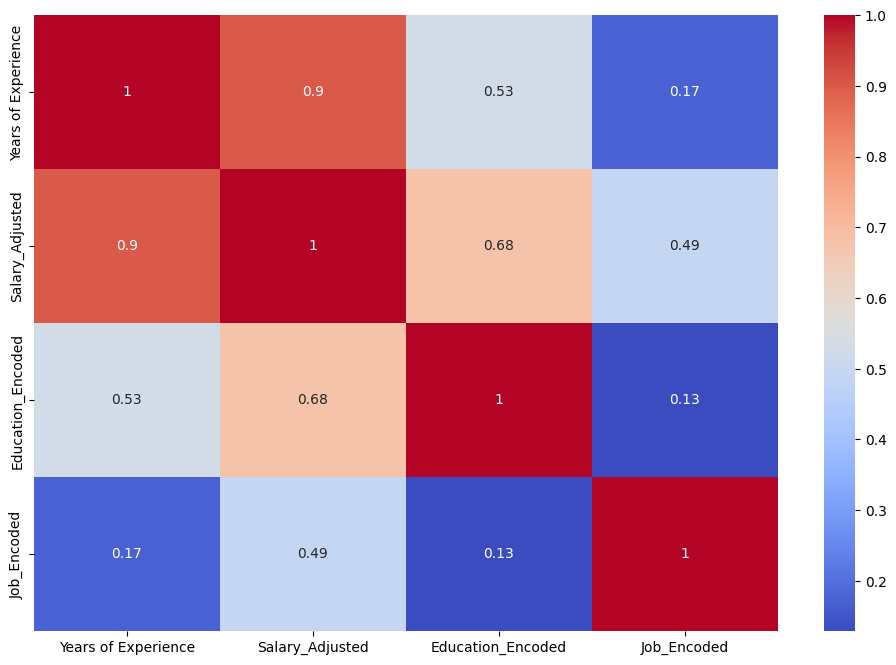

In [ ]:

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')

In [1830]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Salary_Adjusted', axis=1), df['Salary_Adjusted'], test_size=0.2, random_state=42)

In [1831]:
X_train.head()

,Years of Experience,Education_Encoded,Job_Encoded
1034,-0.341157,3,3
4494,1.158226,4,3
6891,0.025359,0,4
1723,0.825030,4,1
1921,-0.507755,2,2


In [ ]:
from sklearn.ensemble import RandomForestRegressor

model  = RandomForestRegressor()

In [ ]:

model .fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:

model .score(X_train, y_train)

0.9880827553109345

In [ ]:

r_pred = model .predict(X_test)

In [1836]:
dfr = pd.DataFrame({'Actual': y_test, 'Predicted': r_pred})
dfr.reset_index(drop=True, inplace=True)
dfr.head(10)

,Actual,Predicted
0,-0.640771,-0.584176
1,0.053901,0.105771
2,2.013456,1.970930
3,-1.604629,-1.543917
4,-0.889695,-0.878558
5,-0.171867,-0.236153
6,3.495424,3.463677
7,0.435971,0.394473
8,-0.768128,-0.706949
9,-1.289132,-1.153636


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16548\3738790308.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dfr['Actual'], color = 'blue', hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Actual')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16548\3738790308.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com

<Axes: xlabel='Predicted', ylabel='Density'>

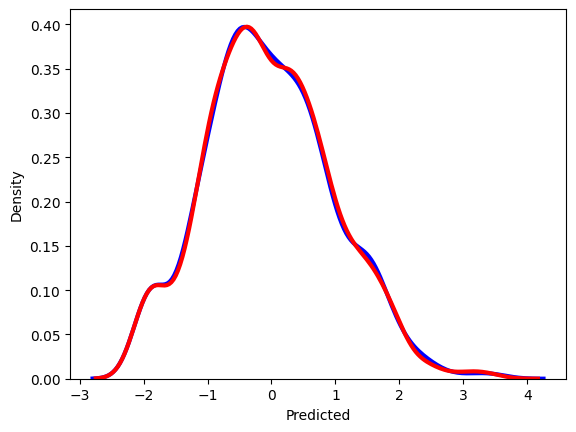

In [1837]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
ax = sns.distplot(dfr['Actual'], color = 'blue', hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Actual')
sns.distplot(  dfr['Predicted'], color = 'red', ax=ax, hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Predicted')

In [1838]:
print("R2 Score: ", r2_score(y_test, r_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, r_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, r_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, r_pred)))

R2 Score:  0.9875553674201446
Mean Squared Error:  0.012525978599240883
Mean Absolute Error:  0.08879031518523163
RMSE: 0.11191951840157678


In [ ]:
model = joblib.load('./modelSalary/salary_predictor.pkl')
le_edu = joblib.load('./modelSalary/le_edu.pkl')
le_job = joblib.load('./modelSalary/le_job.pkl')
scaler_X = joblib.load('./modelSalary/scaler_X.pkl')
scaler_y = joblib.load('./modelSalary/scaler_y.pkl')